# Final project

#### import features

In [102]:
# matrix feature
import numpy as np
import pandas as pd

# visualisation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# preparation
from sklearn.model_selection import train_test_split

# statistics stack
import scipy.stats as ss

# machine learning stack
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB  # Für numerische Features
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# for PCA
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

# for Pipeline
from sklearn.pipeline import Pipeline

#to show calculation times
import time

# miscellaneous
import warnings
warnings.filterwarnings("ignore")

import pickle


### import data

In [2]:
values = pd.read_excel("data/dif_alle.xls", header=None)
label = pd.read_excel("data/label.xls", header=None)
#values2 = pd.read_excel("data/diffweiss_all.xls", header=None)
#label2 = pd.read_excel("data/labels.xls", header=None)

In [3]:
df = values.merge(label, left_index=True, right_index=True, how='left')
#df2 = values2.merge(label2, left_index=True, right_index=True, how='left')

df.index.name = 'measurement'
df.columns = df.columns.map(lambda x: 'p' + str(x))

df.rename(columns={'p0_x': 'p0', 'p0_y': 'y'}, inplace=True)

df.to_csv('df.csv', index=True)

In [4]:
df

,p0,p1,p2,p3,p4,p5,p6,p7,p8,p9,...,p79,p80,p81,p82,p83,p84,p85,p86,p87,y
measurement,,,,,,,,,,,,,,,,,,,,,
0,0.333333,-31.333333,0.666667,-3.333333,5.333333,-0.333333,15.333333,4.000000,-20.000000,-42.666667,...,1.666667,-8.000000,11.333333,2.333333,8.666667,85.333333,319.333333,473.333333,4.333333,1
1,-20.666667,-14.666667,5.000000,1.333333,6.666667,2.666667,19.333333,4.000000,32.666667,69.000000,...,6.000000,-2.666667,6.666667,-0.666667,26.333333,235.666667,1735.000000,2508.000000,-2.666667,1
2,3.333333,22.000000,-4.000000,0.666667,-2.666667,-1.000000,1.333333,-5.000000,-55.000000,-94.333333,...,-2.333333,3.000000,-0.333333,-6.000000,-3.000000,-64.000000,-944.000000,-1372.333333,-3.000000,0
3,-3.333333,-21.000000,0.666667,1.000000,10.666667,5.000000,28.000000,3.333333,39.000000,92.666667,...,2.000000,3.000000,12.333333,4.000000,28.666667,207.666667,1351.666667,2710.666667,2.333333,1
4,-9.666667,-31.333333,3.333333,-1.666667,13.666667,2.666667,37.666667,9.666667,64.666667,45.333333,...,1.000000,-9.000000,15.333333,0.000000,76.666667,393.666667,2109.333333,2601.000000,1.000000,0
5,4.000000,26.666667,4.333333,-13.000000,-2.333333,-0.666667,1.333333,0.000000,42.000000,73.333333,...,-16.666667,-4.666667,-6.000000,-1.000000,-9.666667,46.333333,928.333333,647.666667,-0.666667,0
6,-24.666667,-43.666667,-2.000000,-3.666667,-3.666667,-1.666667,-5.333333,-2.000000,-3.333333,-46.333333,...,-8.666667,-10.666667,-5.333333,-7.000000,-20.666667,63.666667,-13.333333,-520.333333,-3.333333,1
7,-11.666667,-37.000000,3.666667,-3.000000,3.666667,-8.333333,-6.000000,15.666667,38.333333,-4.333333,...,11.666667,3.666667,14.000000,-10.000000,48.666667,271.333333,1561.666667,2439.333333,5.666667,0
8,-21.333333,13.333333,4.666667,0.666667,0.333333,-4.666667,17.000000,2.000000,29.333333,33.333333,...,1.333333,0.333333,6.666667,13.333333,9.333333,112.000000,1049.000000,1491.666667,0.333333,1


### visualize data

In [5]:
df_mean = df.groupby(df['y']).mean()
#df2_mean = df2.groupby(df2['0_y']).mean()
df_n = df.loc[0].tolist()
df_p = df.loc[1].tolist()
#df2_n = df.loc[0].tolist()
#df2_p = df.loc[1].tolist()

In [6]:
dfg = df.groupby(df['y']).std()
dfg_n = dfg.loc[0].tolist()
dfg_p = dfg.loc[1].tolist()

In [7]:
dfg

,p0,p1,p2,p3,p4,p5,p6,p7,p8,p9,...,p78,p79,p80,p81,p82,p83,p84,p85,p86,p87
y,,,,,,,,,,,,,,,,,,,,,
0,8.653286,20.308494,7.133089,5.647915,4.248249,3.400825,9.909938,5.156955,32.896237,47.605961,...,17.919308,6.418640,5.935678,6.482373,4.486488,24.793400,131.217826,945.053851,1169.959142,2.239260
1,13.446189,32.884007,9.155831,5.468971,4.802868,4.051532,9.127732,3.949795,22.809560,53.204274,...,30.166764,6.978664,6.160618,5.831854,6.755115,19.283504,104.997995,801.972117,1074.829061,3.536609


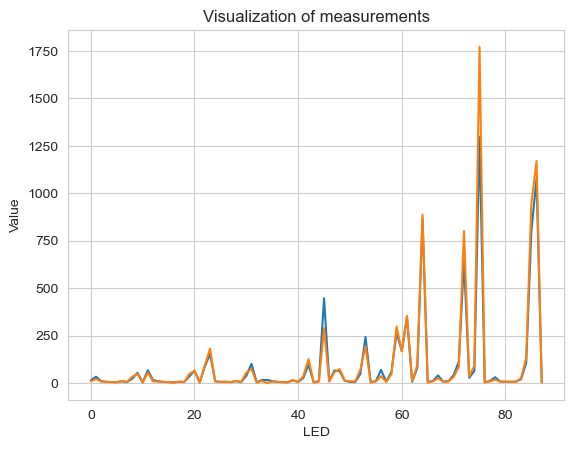

In [8]:
# Create a line plot
plt.plot(dfg_p)
plt.plot(dfg_n)
#
#plt.plot(df2_p)
#plt.plot(df2_n)

# Set plot title and labels
plt.title('Visualization of measurements')
plt.xlabel('LED')
plt.ylabel('Value')

# Show the plot
plt.show()

In [9]:
df_mean

,p0,p1,p2,p3,p4,p5,p6,p7,p8,p9,...,p78,p79,p80,p81,p82,p83,p84,p85,p86,p87
y,,,,,,,,,,,,,,,,,,,,,
0,-0.238095,-6.904762,-1.047619,-1.634921,-0.047619,-1.079365,2.730159,1.793651,9.841270,-2.793651,...,-8.904762,-1.301587,-1.365079,-0.079365,-1.47619,5.428571,54.507937,299.888889,330.793651,0.619048
1,-5.866667,-22.766667,-0.466667,-2.116667,0.383333,-0.850000,9.183333,3.416667,18.066667,-0.800000,...,-23.083333,-0.333333,-3.000000,2.300000,-0.50000,13.016667,86.833333,616.433333,683.100000,-0.466667


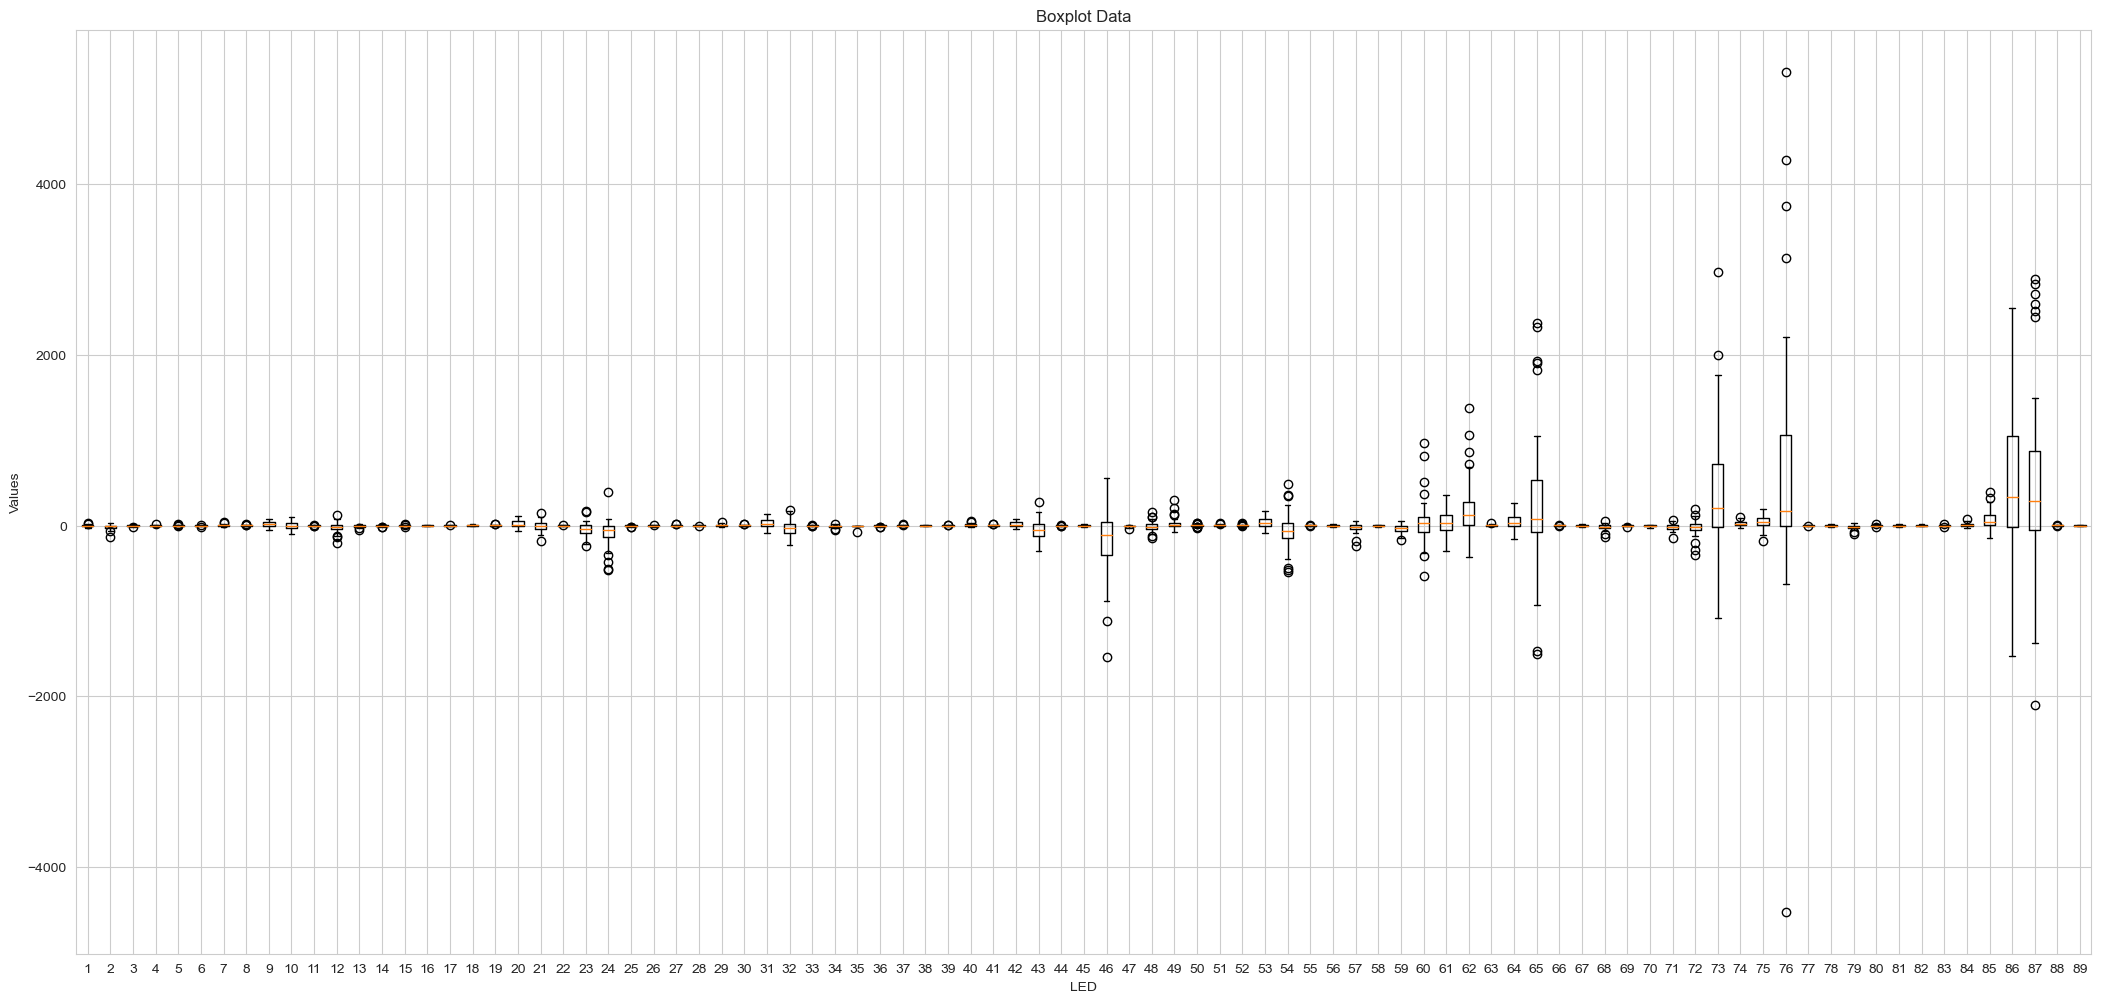

In [10]:
# Subset rows of the DataFrame
subset_df = df#.loc[0:1]

# Create a figure and axes with a larger size
fig, ax = plt.subplots(figsize=(26, 12))

# Create a boxplot on the axes
ax.boxplot(subset_df.values)

# Set plot title and labels
ax.set_title('Boxplot Data')
ax.set_xlabel('LED')
ax.set_ylabel('Values')

# Show the plot
plt.show()

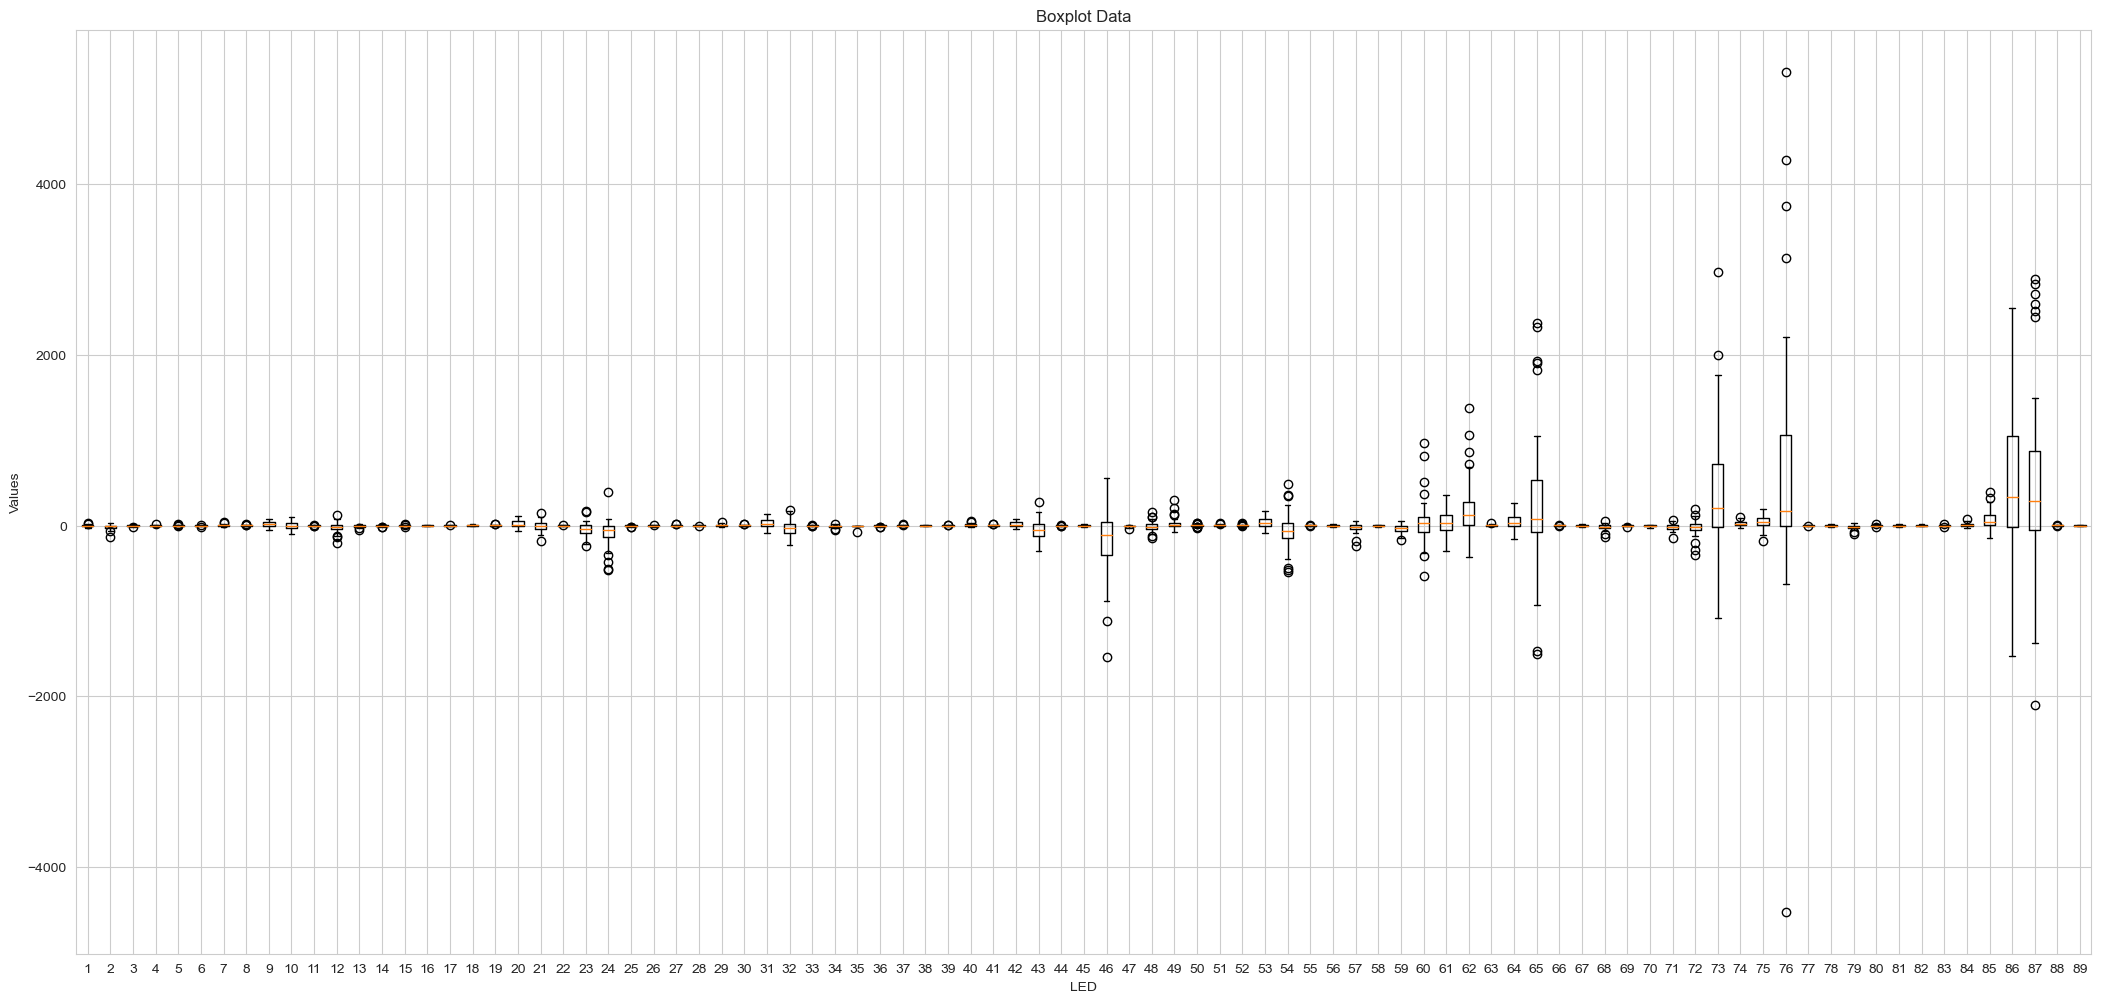

In [11]:
# Subset rows of the DataFrame
subset_df = df  #.iloc[:]

# Create a figure and axes with a larger size
fig, ax = plt.subplots(figsize=(26, 12))

# Create a boxplot on the axes
ax.boxplot(subset_df.values)

# Set plot title and labels
ax.set_title('Boxplot Data')
ax.set_xlabel('LED')
ax.set_ylabel('Values')

# Show the plot
plt.show()

### train-test-split with or without Augmentation

In [12]:
augmentation = (
                False #Activate for raw data
                #True    #Activate for more data generation (Augmentation)
                )

if augmentation:
    # TRAIN/TEST Split before aufmentation
    X = df.drop('y', axis=1) #remove target from train data
    y = df['y'] #target

    # The function train_test_split() randomly separate the data. 
    Xtrain, Xtest, ytrain, ytest = \
    train_test_split(X, y, test_size=0.2,random_state=100, stratify=y)
    df_train = Xtrain.merge(ytrain, left_index=True, right_index=True, how='left')

    ############################################################################################
    # Define augmentation parameters
    augmentation_factor = 6  # Number of augmented samples to generate
    augmentation_std = 0.01  # Standard deviation for data perturbation
    ############################################################################################

    # Perform data augmentation
    augmented_data = []
    for _, row in df_train.iterrows():
        for _ in range(augmentation_factor):
            augmented_row = row + np.random.normal(scale=augmentation_std, size=len(row))
            augmented_data.append(augmented_row)

    # Convert augmented data to a new DataFrame
    augmented_df = pd.DataFrame(augmented_data, columns=df_train.columns)

    # Combine original and augmented data
    combined_df = pd.concat([df_train, augmented_df], ignore_index=True)

    #round y to 0/1
    combined_df['y'] = combined_df['y'].round()
    combined_df['y'] = combined_df['y'].astype(int)

    # Display the combined DataFrame
    #print(combined_df) #for showing results

    Xtrain = combined_df.drop('y', axis=1) #remove target from train data
    ytrain = combined_df['y'] #target
    df_train = Xtrain.merge(ytrain, left_index=True, right_index=True, how='left')

else:
    #without augmentation
    X = df.drop('y', axis=1) #remove target from train data
    y = df['y'] #target

    # The function train_test_split() randomly separate the data. 
    Xtrain, Xtest, ytrain, ytest = \
    train_test_split(X, y, test_size=0.2,random_state=112, stratify=y)

    #for PCA needed combination Xtrain + ytrain
    df_train = Xtrain.merge(ytrain, left_index=True, right_index=True, how='left')


#train/test split without augmentation
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

# DataFrame als CSV-Datei speichern
Xtrain.to_csv('Xtrain.csv', index=True)
Xtest.to_csv('Xtest.csv', index=True)
ytrain.to_csv('ytrain.csv', index=True)
ytest.to_csv('ytest.csv', index=True)

In [13]:
df_train

,p0,p1,p2,p3,p4,p5,p6,p7,p8,p9,...,p79,p80,p81,p82,p83,p84,p85,p86,p87,y
measurement,,,,,,,,,,,,,,,,,,,,,
21,11.000000,-28.333333,-5.000000,12.000000,1.333333,0.333333,16.333333,10.333333,75.000000,66.666667,...,-4.000000,-5.666667,1.666667,-0.333333,28.333333,269.666667,2164.333333,2890.000000,1.666667,0
17,9.666667,-7.333333,15.000000,3.000000,-3.666667,-3.000000,1.000000,1.333333,-12.333333,-22.333333,...,-2.666667,-10.000000,-6.000000,-2.666667,10.333333,37.000000,-123.333333,84.666667,-3.333333,1
36,-6.333333,-22.000000,-8.666667,2.333333,-2.000000,-1.333333,0.333333,0.333333,-8.333333,-23.000000,...,7.333333,4.333333,-3.666667,0.666667,-28.000000,18.000000,-460.000000,-190.666667,0.333333,0
31,-2.000000,-4.666667,13.666667,-6.333333,-6.000000,-6.333333,-3.666667,-5.000000,-30.333333,-68.000000,...,-4.000000,-4.000000,-7.000000,-4.000000,-32.666667,-76.333333,-1535.000000,-57.666667,-1.333333,0
33,12.666667,-60.333333,-2.333333,-4.333333,0.333333,-3.333333,18.666667,9.000000,19.333333,-8.666667,...,-0.666667,-8.333333,3.666667,-4.000000,50.000000,324.666667,2552.666667,2827.666667,7.000000,1
11,-26.333333,-4.333333,-3.333333,-11.333333,1.666667,7.333333,12.000000,11.666667,60.666667,101.333333,...,-7.333333,3.666667,8.333333,10.333333,27.000000,217.000000,898.666667,927.333333,-2.333333,1
28,-20.666667,6.666667,-18.666667,6.333333,3.333333,1.000000,4.333333,-1.333333,14.000000,-3.000000,...,13.000000,7.000000,7.000000,2.666667,1.333333,7.666667,-54.333333,237.000000,-3.666667,1
1,-20.666667,-14.666667,5.000000,1.333333,6.666667,2.666667,19.333333,4.000000,32.666667,69.000000,...,6.000000,-2.666667,6.666667,-0.666667,26.333333,235.666667,1735.000000,2508.000000,-2.666667,1
29,10.000000,2.666667,9.666667,-4.333333,-3.000000,-1.000000,-3.000000,-3.333333,-0.666667,-28.000000,...,-9.000000,-2.333333,-5.666667,-2.666667,-9.333333,-149.000000,-855.000000,-1280.666667,-1.000000,1


In [14]:
#train/test split without augmentation
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((32, 88), (9, 88), (32,), (9,))

In [15]:
Xtrain.head(2)

,p0,p1,p2,p3,p4,p5,p6,p7,p8,p9,...,p78,p79,p80,p81,p82,p83,p84,p85,p86,p87
measurement,,,,,,,,,,,,,,,,,,,,,
21,11.000000,-28.333333,-5.0,12.0,1.333333,0.333333,16.333333,10.333333,75.000000,66.666667,...,-5.666667,-4.000000,-5.666667,1.666667,-0.333333,28.333333,269.666667,2164.333333,2890.000000,1.666667
17,9.666667,-7.333333,15.0,3.0,-3.666667,-3.000000,1.000000,1.333333,-12.333333,-22.333333,...,-19.666667,-2.666667,-10.000000,-6.000000,-2.666667,10.333333,37.000000,-123.333333,84.666667,-3.333333


In [16]:
XtrainN = Xtrain.copy()

In [17]:
df_mean_aug = df.groupby(df['y']).mean()
df_mean_aug

,p0,p1,p2,p3,p4,p5,p6,p7,p8,p9,...,p78,p79,p80,p81,p82,p83,p84,p85,p86,p87
y,,,,,,,,,,,,,,,,,,,,,
0,-0.238095,-6.904762,-1.047619,-1.634921,-0.047619,-1.079365,2.730159,1.793651,9.841270,-2.793651,...,-8.904762,-1.301587,-1.365079,-0.079365,-1.47619,5.428571,54.507937,299.888889,330.793651,0.619048
1,-5.866667,-22.766667,-0.466667,-2.116667,0.383333,-0.850000,9.183333,3.416667,18.066667,-0.800000,...,-23.083333,-0.333333,-3.000000,2.300000,-0.50000,13.016667,86.833333,616.433333,683.100000,-0.466667


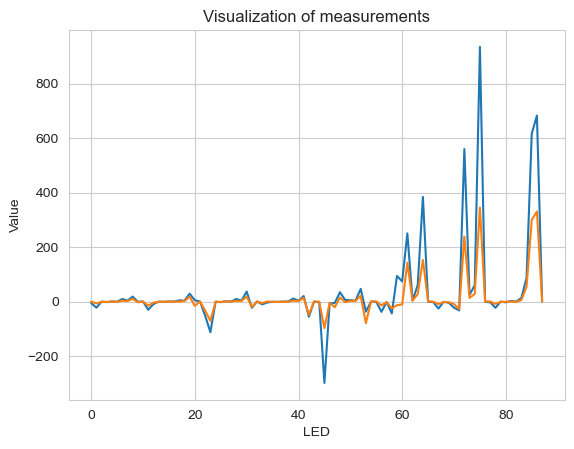

In [18]:
# Create a line plot
plt.plot(df_mean_aug.loc[1].tolist())
plt.plot(df_mean_aug.loc[0].tolist())
#
#plt.plot(df2_p)
#plt.plot(df2_n)

# Set plot title and labels
plt.title('Visualization of measurements')
plt.xlabel('LED')
plt.ylabel('Value')

# Show the plot
plt.show()

## Baseline model

In [19]:
# Baseline Model: All people died!

from sklearn.dummy import DummyClassifier
dummy_model = DummyClassifier(strategy='most_frequent')
# model training
dummy_model.fit(Xtrain,ytrain)

DummyClassifier(strategy='most_frequent')

In [20]:
training_score = round(dummy_model.score(Xtrain,ytrain),6)
validation_score = round(dummy_model.score(Xtest,ytest),6)
print(f"training score: {training_score}")
print(f"validation score: {validation_score}")

training score: 0.5
validation score: 0.555556


### Scaler (out: xtrain_scale)

In [21]:
Xtrain.head(2)

,p0,p1,p2,p3,p4,p5,p6,p7,p8,p9,...,p78,p79,p80,p81,p82,p83,p84,p85,p86,p87
measurement,,,,,,,,,,,,,,,,,,,,,
21,11.000000,-28.333333,-5.0,12.0,1.333333,0.333333,16.333333,10.333333,75.000000,66.666667,...,-5.666667,-4.000000,-5.666667,1.666667,-0.333333,28.333333,269.666667,2164.333333,2890.000000,1.666667
17,9.666667,-7.333333,15.0,3.0,-3.666667,-3.000000,1.000000,1.333333,-12.333333,-22.333333,...,-19.666667,-2.666667,-10.000000,-6.000000,-2.666667,10.333333,37.000000,-123.333333,84.666667,-3.333333


In [22]:
# instantiate standard scaler 
scaler = StandardScaler()

In [23]:
# fit and transform training data
Xtrain_scale = scaler.fit_transform(Xtrain)

In [24]:
# fit and transform training data
Xtrain_scale = scaler.fit_transform(Xtrain) 
#X_poly = poly_features.fit_transform(Xtrain_scale)

# transform test data
Xtest_scale = scaler.fit_transform(Xtest)

### Logistic regression

In [25]:
log_model = LogisticRegression()
log_model.fit(Xtrain_scale,ytrain)

LogisticRegression()

In [26]:
ypred = log_model.predict(Xtest_scale)
#ypred= np.round(ypred,0)
ypred

array([0, 1, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [27]:
training_score = round(log_model.score(Xtrain_scale,ytrain),3) 
test_score = round(log_model.score(Xtest_scale, ytest),3)
print(f"training score: {training_score}")
print(f"test score: {test_score}")

training score: 1.0
test score: 0.333


In [28]:
# Get the coefficient values
coefficients = log_model.coef_[0]

# Get the intercept value
intercept = log_model.intercept_[0]

# Get the feature names
feature_names = X.columns  # Replace with your actual feature names

# Create the formula string
formula = "log(p / (1 - p)) = {:.4f} + ".format(intercept)
for feature, coefficient in zip(feature_names, coefficients):
    formula += "{:.4f}*{} + ".format(coefficient, feature)

# Remove the trailing '+'
formula = formula[:-3]

# Print the formula
print(formula)


log(p / (1 - p)) = 0.2813 + -0.2016*p0 + -0.0877*p1 + 0.1591*p2 + -0.1699*p3 + 0.2840*p4 + -0.1816*p5 + 0.3664*p6 + -0.1838*p7 + 0.6241*p8 + -0.2252*p9 + 0.1397*p10 + -0.0253*p11 + 0.2041*p12 + 0.1639*p13 + -0.0693*p14 + 0.0776*p15 + 0.0114*p16 + 0.4744*p17 + -0.3711*p18 + -0.0513*p19 + 0.1302*p20 + -0.2783*p21 + -0.0111*p22 + 0.0130*p23 + 0.0983*p24 + -0.1835*p25 + 0.1769*p26 + 0.0629*p27 + 0.5934*p28 + 0.1585*p29 + 0.1671*p30 + -0.1243*p31 + 0.0808*p32 + -0.0165*p33 + -0.4614*p34 + 0.0931*p35 + -0.0282*p36 + 0.1717*p37 + 0.2298*p38 + 0.2312*p39 + -0.3000*p40 + -0.1402*p41 + -0.1280*p42 + -0.0693*p43 + 0.1505*p44 + -0.1933*p45 + 0.0017*p46 + 0.4908*p47 + -0.1128*p48 + 0.3564*p49 + 0.5032*p50 + -0.0681*p51 + 0.1235*p52 + 0.0690*p53 + -0.0824*p54 + 0.0102*p55 + -0.2303*p56 + 0.2391*p57 + -0.0814*p58 + 0.1526*p59 + 0.2828*p60 + -0.3262*p61 + -0.3249*p62 + -0.0518*p63 + -0.1860*p64 + -0.1500*p65 + 0.1689*p66 + -0.3903*p67 + 0.0844*p68 + 0.3078*p69 + -0.2921*p70 + -0.1557*p71 + 0.4799*p72 

### Model Naive Bayes


In [29]:
# Für numerische Features
model_gnb = GaussianNB()

model_gnb.fit(Xtrain, ytrain)

print(round(model_gnb.score(Xtrain, ytrain),3))
print(round(model_gnb.score(Xtest, ytest),3))

0.781
0.444


### Model SVC

In [30]:
svc= SVC()
Xtrain_scale_svc = svc.fit(Xtrain_scale, ytrain)
y_pred = svc.predict(Xtest_scale)
y_pred
accuracy = svc.score(Xtest_scale, ytest)
accuracy

0.2222222222222222

### Model ponynomal (still errors)

In [31]:
degree = 3  # Set the degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(Xtrain_scale)

In [32]:
# fit and transform training data
#X_poly = scaler.fit_transform(X_poly) 

# Fit the polynomial regression model
lin_model = LinearRegression()
lin_model.fit(X_poly, ytrain)

# Predict using the polynomial regression model
#X_test = np.array([6]).reshape((-1, 1))
X_test_poly = poly_features.transform(Xtest_scale)
y_pred = lin_model.predict(X_test_poly)

y_pred_c = []
for i in y_pred:
    if i<0.5:
        i=0
        y_pred_c.append(i)
    elif i>=0.5:
        i=1
        y_pred_c.append(i)

print("Predicted value:",  y_pred, " rounded to:", y_pred_c)
accuracy = accuracy_score(ytest, y_pred_c)
print("acuracy_score", accuracy)

Predicted value: [0.63495981 0.56947132 0.00610002 0.54985598 0.60863726 1.23140219
 0.36717131 0.7054401  0.60380006]  rounded to: [1, 1, 0, 1, 1, 1, 0, 1, 1]
acuracy_score 0.2222222222222222


In [33]:
print(round(lin_model.score(X_poly, ytrain),3))

print(round(lin_model.score(X_test_poly, ytest),3))

1.0
-1.095


### Model Random Forest

In [103]:
feature_names = [f"f {i}" for i in range(Xtrain.shape[1])]
model_rdmf= RandomForestClassifier()#(n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_depth=10, bootstrap=True)
# good results for (max_features="log2", n_estimators=1000)
model_rdmf.fit(Xtrain, ytrain)

with open('./model_rdmf.pkl', 'wb') as file:
    pickle.dump(model_rdmf, file)

In [35]:
print(round(model_rdmf.score(Xtrain, ytrain),3))
print(round(model_rdmf.score(Xtest, ytest),3))

1.0
0.333


In [36]:
start_time = time.time()
importances = model_rdmf.feature_importances_
std = np.std([tree.feature_importances_ for tree in model_rdmf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")



Elapsed time to compute the importances: 0.015 seconds


In [37]:
print(importances)
type(importances)
importances = np.sort(importances)[::-1]
print(importances)

[0.0153279  0.00945422 0.00542297 0.01278168 0.00887338 0.00094909
 0.06417022 0.00658808 0.021448   0.00726585 0.00460795 0.0053282
 0.00144133 0.00210582 0.00677732 0.01675472 0.         0.03944825
 0.01651849 0.00894462 0.00375319 0.0025     0.01479905 0.00770725
 0.00217516 0.00423328 0.00647282 0.         0.05424085 0.00808354
 0.014249   0.00513008 0.00403642 0.00379944 0.         0.00514676
 0.01231089 0.00966701 0.00372566 0.02661355 0.01123361 0.00966111
 0.01282927 0.00094118 0.01178697 0.00859103 0.003429   0.01942477
 0.00743729 0.03348333 0.02547088 0.00763076 0.01332239 0.01484382
 0.00454816 0.00440289 0.00762814 0.01966557 0.00602133 0.00669773
 0.00920029 0.0042007  0.0258972  0.00189434 0.02782651 0.00918688
 0.00772999 0.00719097 0.00543485 0.00733823 0.01292859 0.00781078
 0.01236435 0.01123884 0.0052831  0.01274246 0.01004092 0.0151951
 0.01201785 0.00875385 0.00473543 0.00876298 0.03134798 0.02399312
 0.0008637  0.00853414 0.02494848 0.01063712]
[0.06417022 0.0542

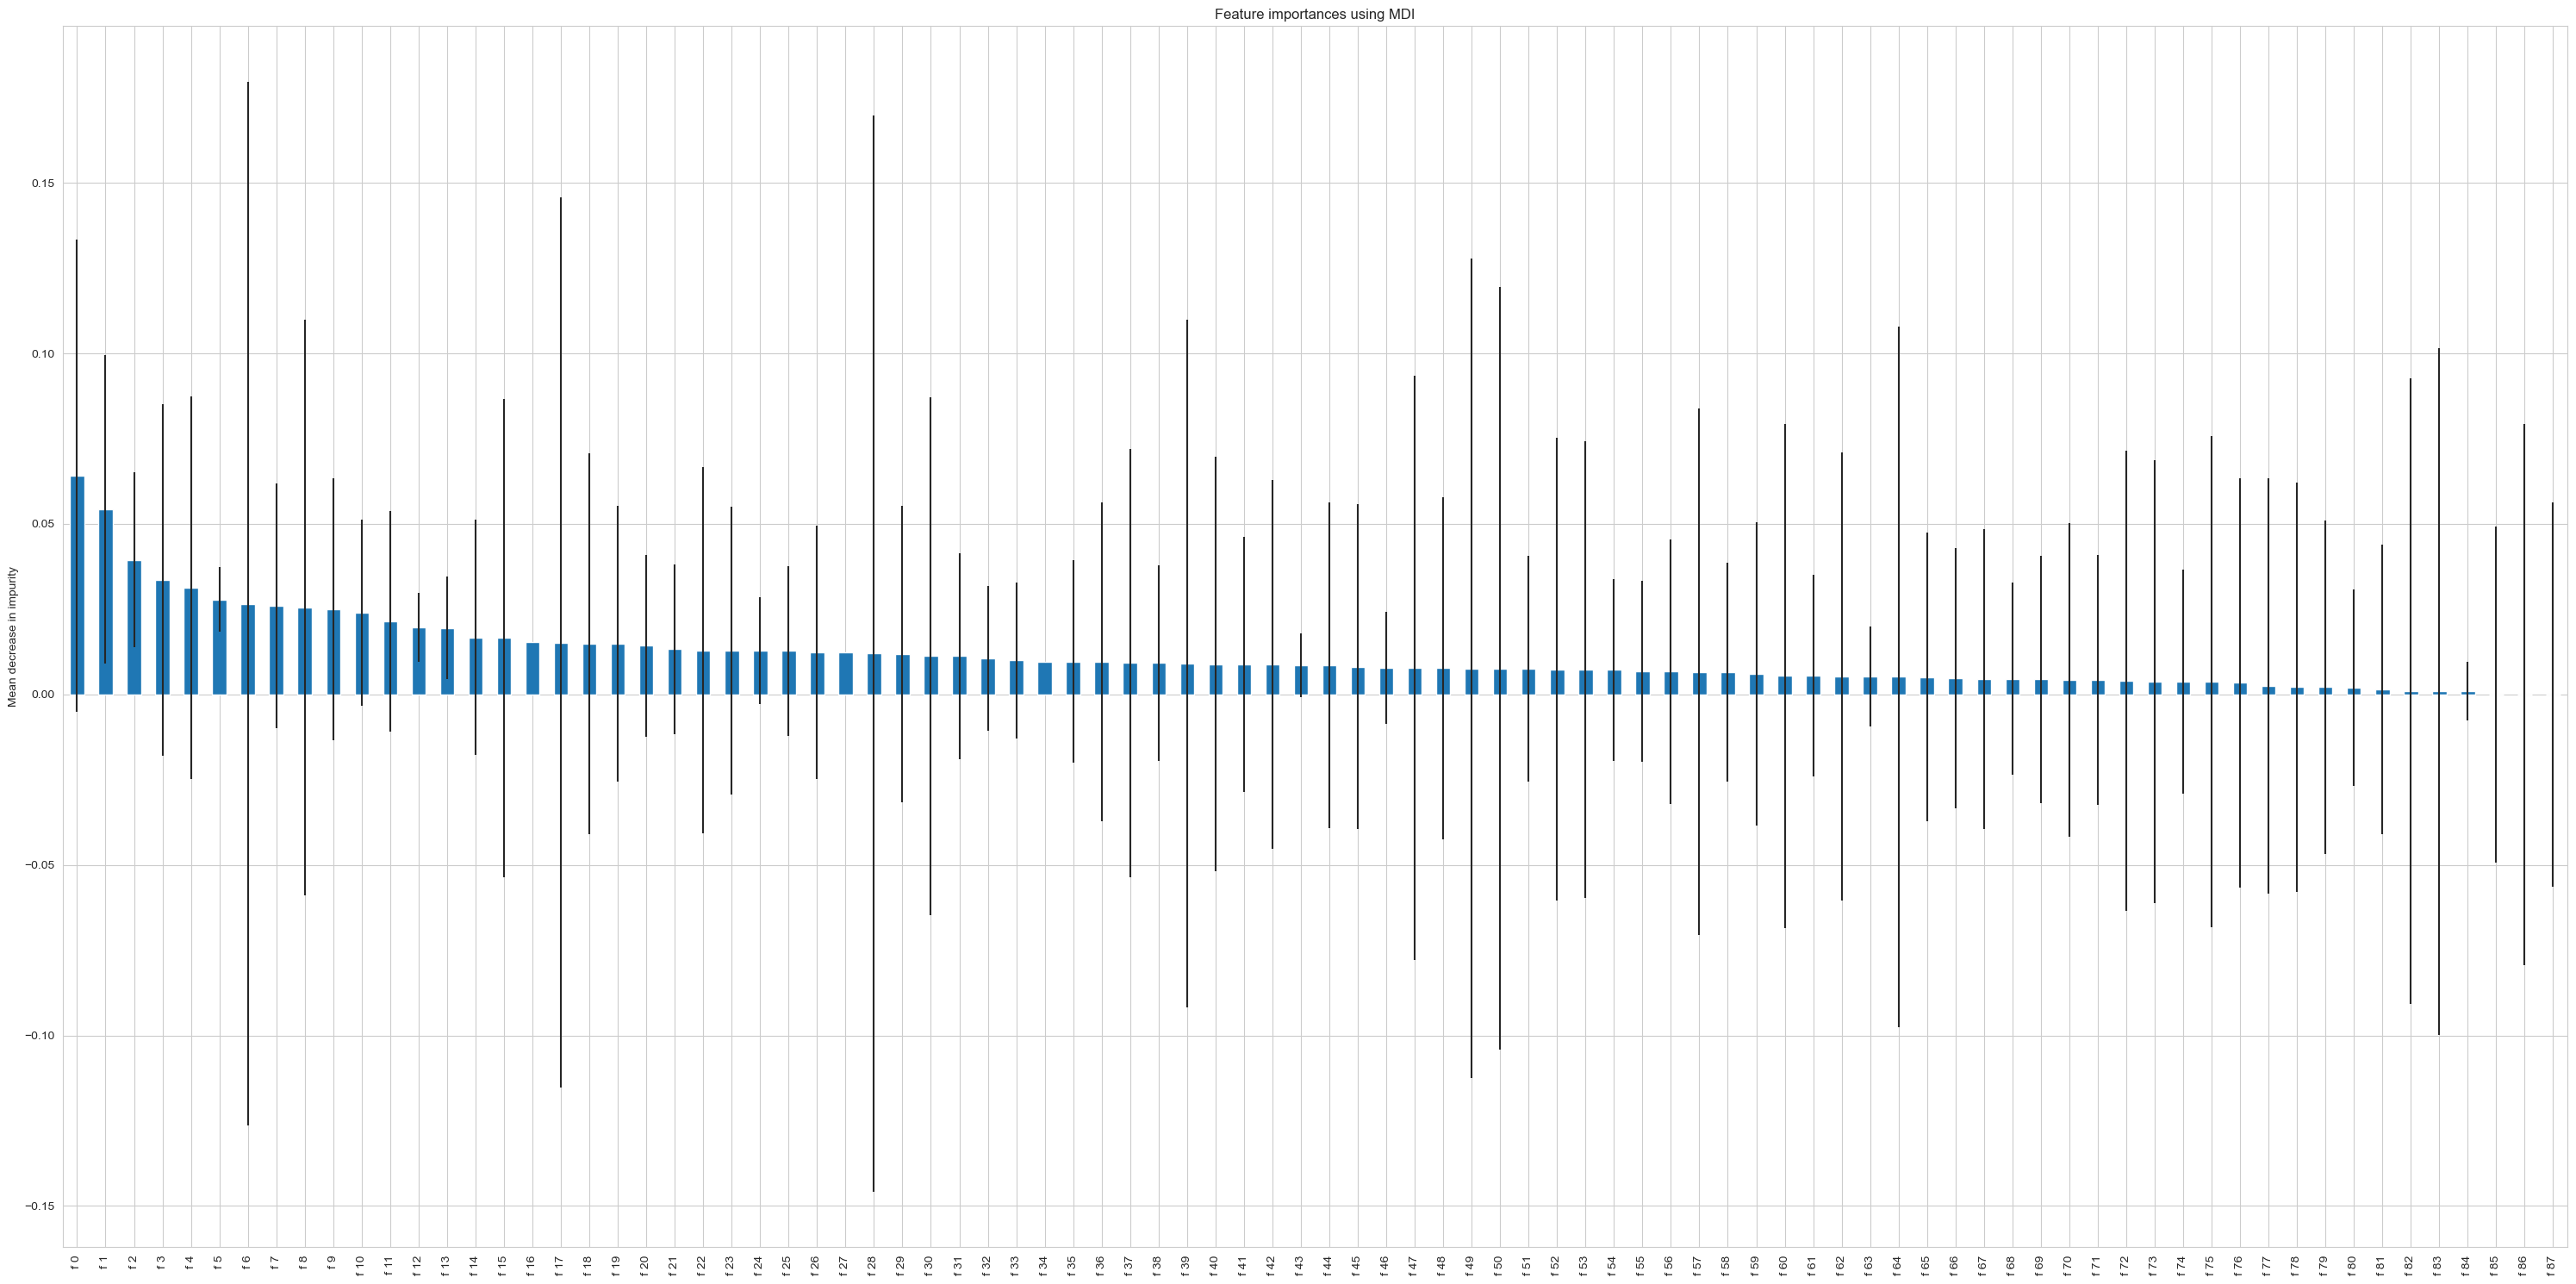

In [38]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots(figsize=(30,15),dpi=100)
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [39]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    model_rdmf, Xtest, ytest, n_repeats=10, random_state=41, n_jobs=6
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 7.271 seconds


In [40]:
forest_importances.sort_values(ascending=False).head(20)

f 6     0.022222
f 0     0.000000
f 56    0.000000
f 64    0.000000
f 63    0.000000
f 62    0.000000
f 61    0.000000
f 60    0.000000
f 59    0.000000
f 58    0.000000
f 57    0.000000
f 55    0.000000
f 66    0.000000
f 54    0.000000
f 53    0.000000
f 52    0.000000
f 51    0.000000
f 50    0.000000
f 49    0.000000
f 48    0.000000
dtype: float64

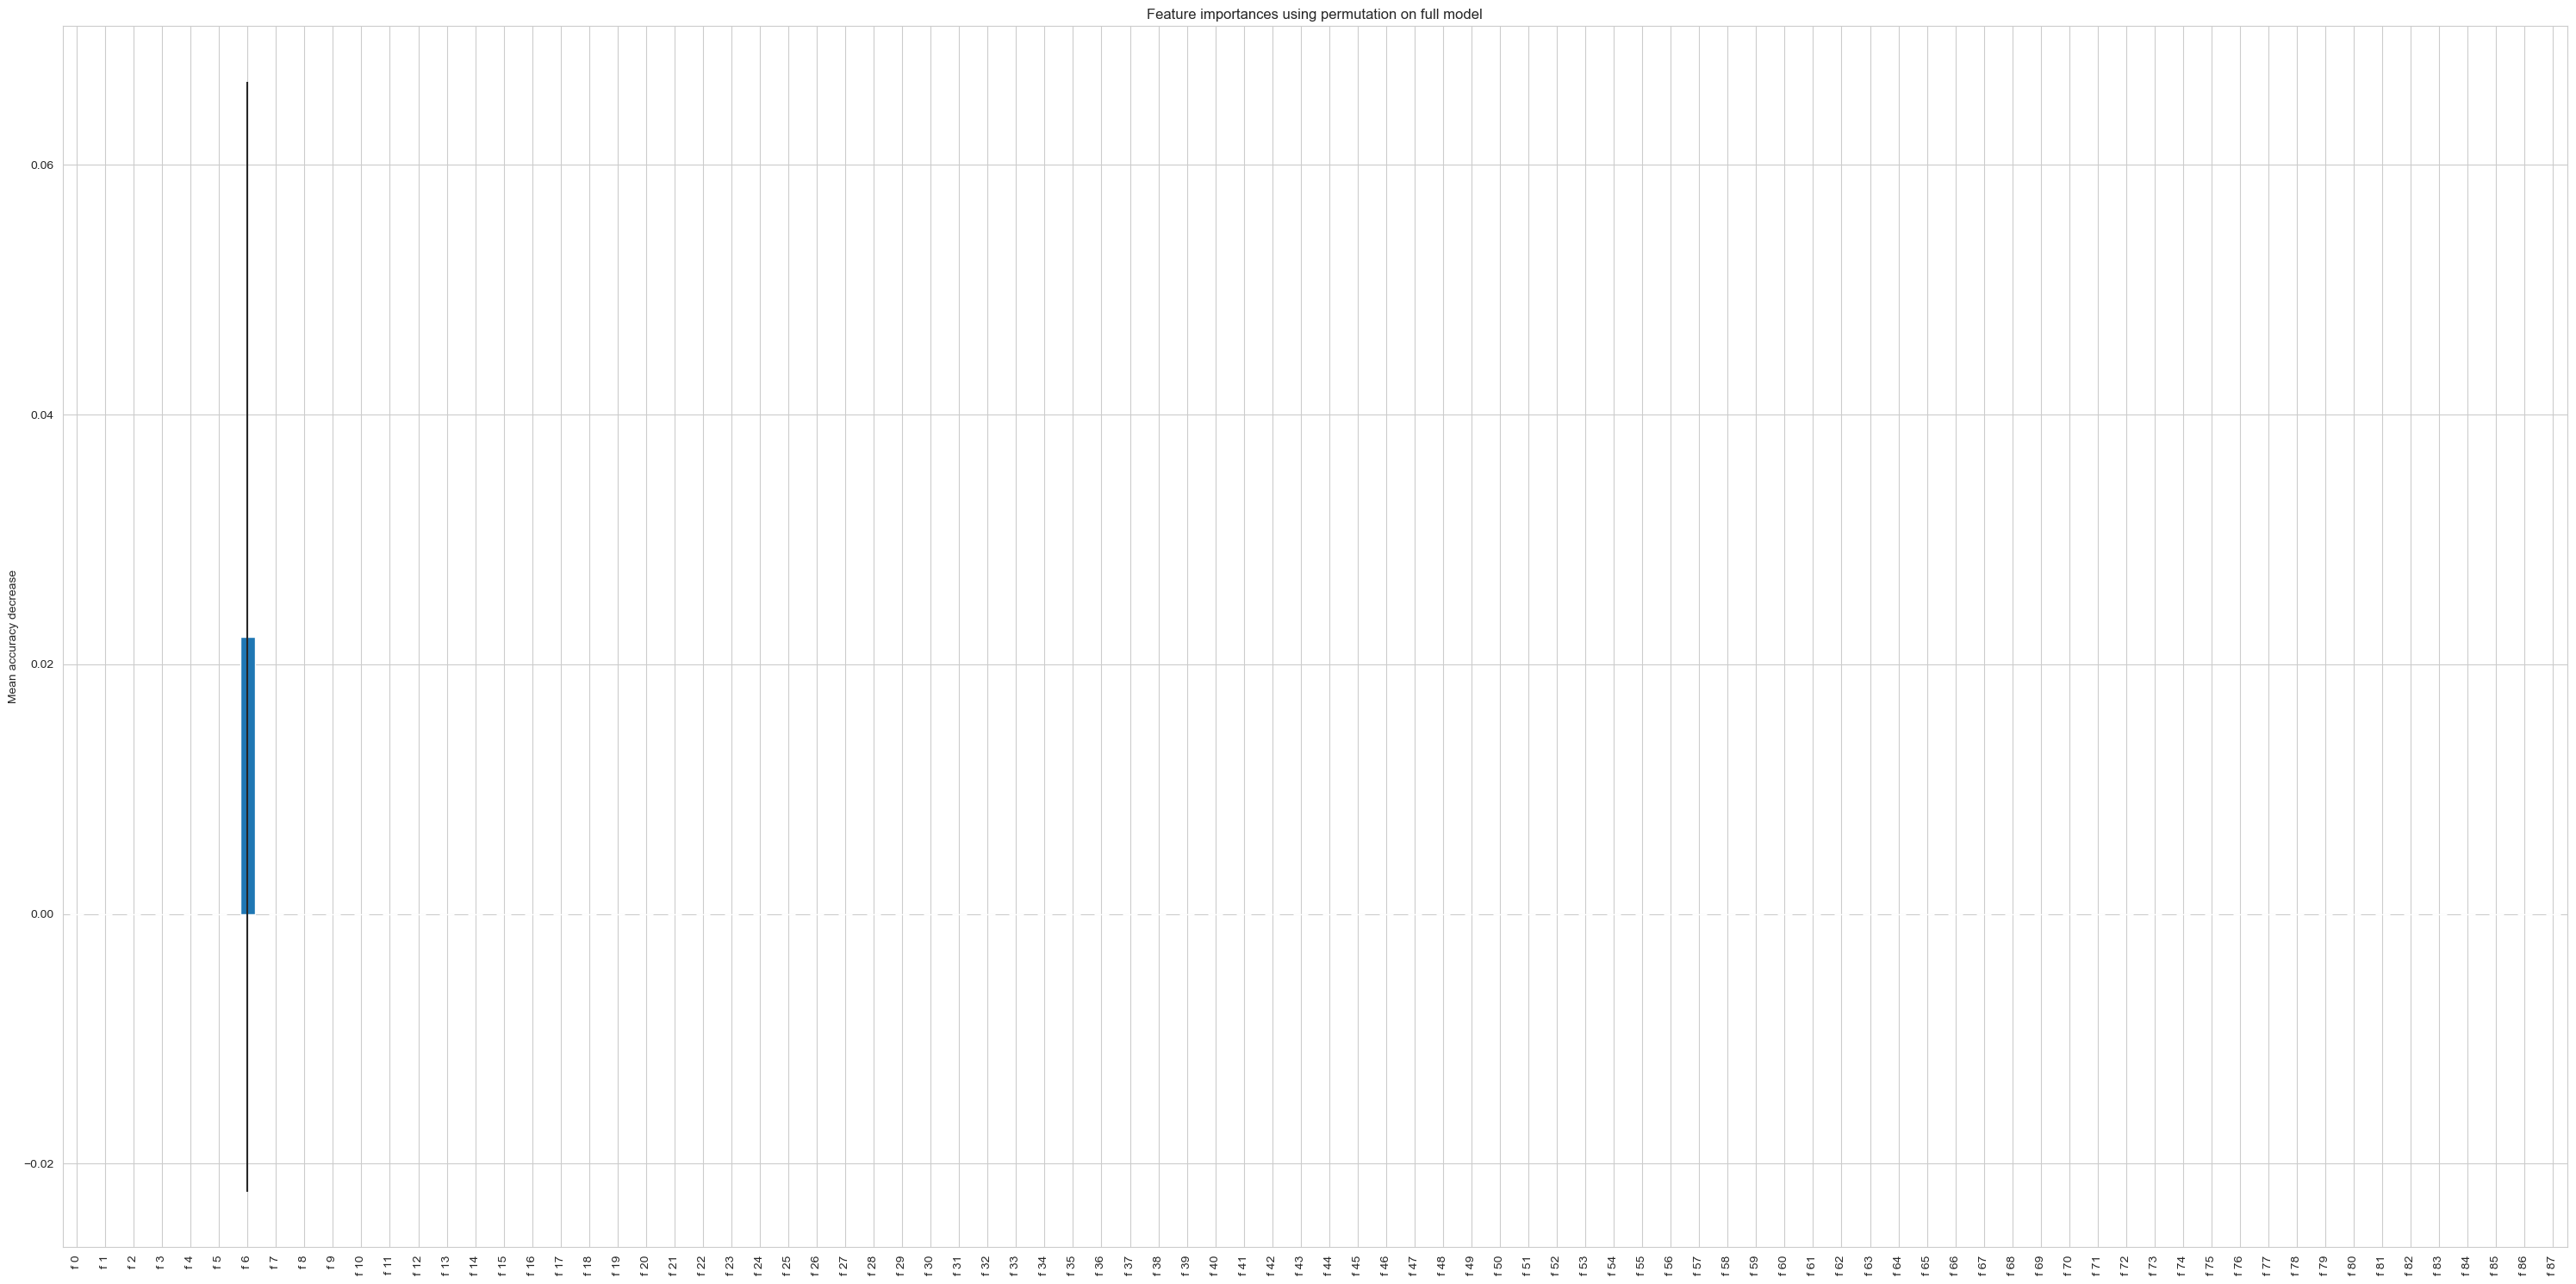

In [41]:
fig, ax = plt.subplots(figsize=(30,15),dpi=100)
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

## PCA

In [42]:
'''
# Correlation matrix
plt.figure(figsize=(60,30),dpi=1000)
sns.heatmap(
    correlation_matrix,
    cmap='coolwarm',
    linecolor='white',
    linewidth=2,
    annot=True,
    vmin=-1, 
    vmax=1);
'''

"\n# Correlation matrix\nplt.figure(figsize=(60,30),dpi=1000)\nsns.heatmap(\n    correlation_matrix,\n    cmap='coolwarm',\n    linecolor='white',\n    linewidth=2,\n    annot=True,\n    vmin=-1, \n    vmax=1);\n"

In [43]:
pca = PCA()
pca.fit(Xtrain_scale)

PCA()

In [44]:
principal_components = pca.components_

In [45]:
# number of pcs
number_of_pcs = principal_components.shape[0]
number_of_pcs

32

In [46]:
# feature_space_dimensionality
principal_components.shape[1]

88

In [47]:
pc_df = pd.DataFrame(
    dict(enumerate(principal_components))
)
pc_df.rename(
    index = lambda x: X.columns[x],
    columns = lambda x: 'pc'+str(x+1),
    inplace = True
)
pc_df

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc23,pc24,pc25,pc26,pc27,pc28,pc29,pc30,pc31,pc32
p0,-0.023623,0.052510,-0.185835,0.002318,-0.020323,-0.003838,0.083138,0.156041,0.370535,-0.009345,...,-0.046969,0.040079,0.201269,-0.061723,-0.128337,0.025433,0.221986,0.009890,0.061500,-0.018368
p1,-0.087429,-0.178099,-0.120455,0.023554,0.049199,-0.034706,0.024415,-0.087927,0.016685,0.153959,...,0.028228,-0.027441,0.027227,-0.081049,0.023107,-0.021744,-0.089341,-0.080242,0.163267,-0.137261
p2,-0.007327,0.126462,-0.198080,0.038206,0.196864,-0.051228,-0.132024,-0.095623,-0.049396,0.052329,...,0.008109,-0.137080,-0.049169,0.078840,0.008964,0.045670,-0.031265,-0.056192,-0.022886,0.373779
p3,0.012480,-0.006202,0.018191,0.360854,-0.058044,-0.000028,0.012308,-0.003763,0.090884,0.092950,...,0.011278,-0.097463,0.050503,-0.032054,-0.017887,0.036098,-0.037445,0.020655,-0.002454,-0.203415
p4,0.135568,-0.044183,0.034918,-0.070859,-0.025246,-0.214817,-0.101346,-0.034096,0.034332,-0.147659,...,0.028565,0.008172,0.118441,-0.094341,0.143108,0.161770,-0.031452,-0.076286,0.046026,0.008242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
p83,0.150718,0.028511,0.044485,0.026551,0.110728,0.014717,0.090577,0.144720,0.100524,-0.042966,...,-0.089414,0.010928,-0.114093,-0.300715,0.074885,0.121831,0.015284,-0.062757,-0.015258,0.183395
p84,0.172826,0.022919,0.011809,-0.015915,0.055327,0.025170,0.062156,0.004316,0.039818,0.143999,...,-0.229378,-0.136364,0.114022,-0.110545,-0.036867,-0.018759,0.001990,0.062106,-0.134434,0.051936
p85,0.170507,0.011821,-0.015023,0.015752,0.007943,0.133895,0.030719,-0.023241,0.006132,0.057652,...,-0.077137,-0.143716,-0.299844,0.183519,-0.024001,-0.033262,0.024423,0.136051,0.066620,0.022057
p86,0.171484,-0.010939,-0.005001,0.009946,0.017863,0.050468,-0.007804,-0.063419,-0.021209,0.109913,...,0.042608,0.230140,0.011938,0.054822,-0.050860,0.182384,0.039718,0.043746,-0.100692,0.018816


In [48]:
# orthogonality
pc1 = pc_df['pc1']
pc2 = pc_df['pc2']

pc1.dot(pc2)

5.0306980803327406e-17

In [49]:
# normalization
np.linalg.norm(pc1)

1.0

In [50]:
# explained variance ratio
evr = pd.DataFrame(
    data=pca.explained_variance_ratio_,
    index=pc_df.columns,
    columns=['explained_variance_ratio']
)
evr

,explained_variance_ratio
pc1,3.319203e-01
pc2,1.564238e-01
pc3,1.061660e-01
pc4,7.496373e-02
pc5,7.032537e-02
pc6,4.883756e-02
pc7,4.297167e-02
pc8,2.840980e-02
pc9,2.532089e-02
pc10,2.030998e-02


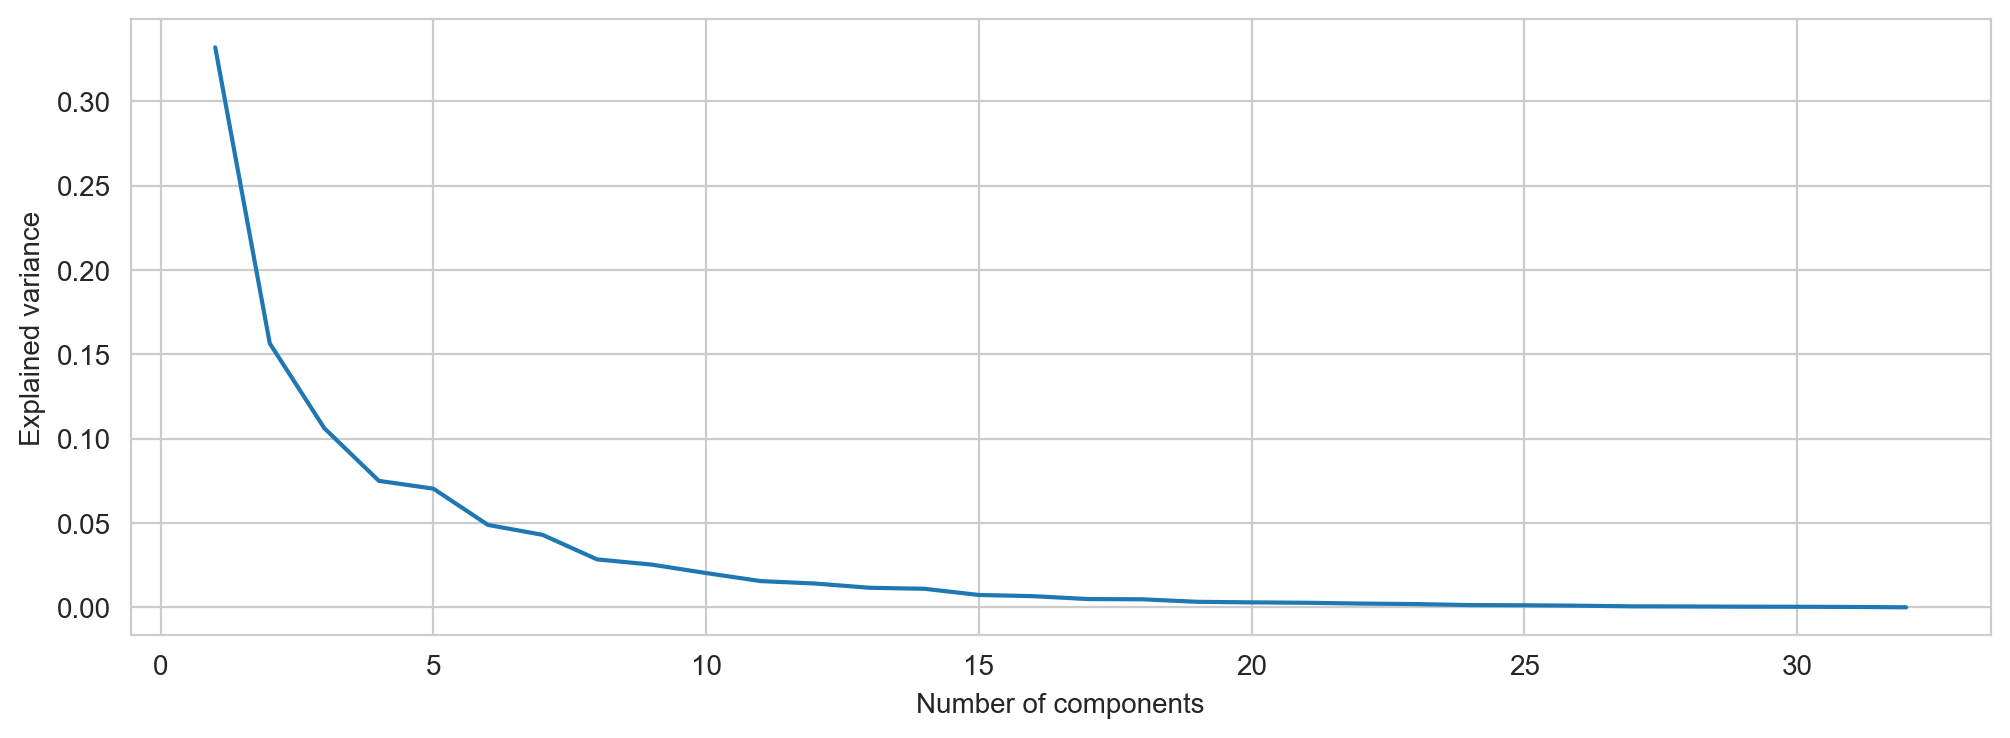

In [51]:
plt.figure(figsize=(12,4), dpi=200)
sns.lineplot(
    x=list(range(1, number_of_pcs+1)),
    y=evr['explained_variance_ratio']
)
plt.xlabel('Number of components')
plt.ylabel('Explained variance');

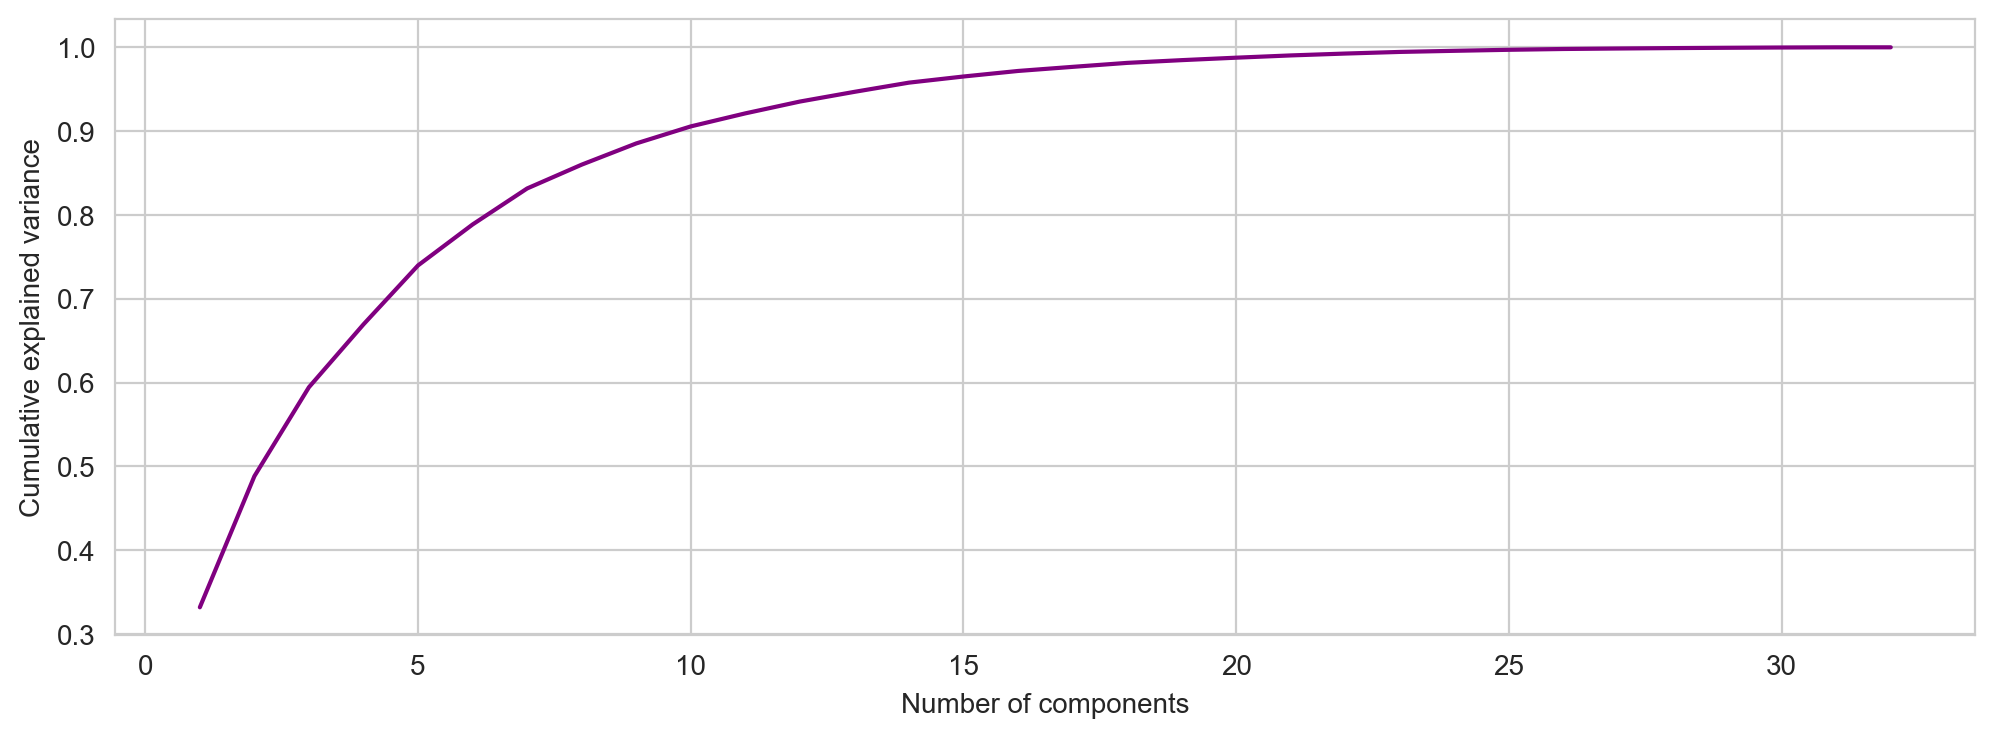

In [52]:
plt.figure(figsize=(12,4), dpi=200)
sns.lineplot(
    x=list(range(1, number_of_pcs+1)),
    y=evr['explained_variance_ratio'].cumsum(),
    color='purple'
)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');

In [53]:
model_pca = PCA(n_components=0.9, svd_solver='full')
model_pca.fit(Xtrain_scale)
print(f"""
Number of components explaining 90% variance: {model_pca.n_components_}
""")


Number of components explaining 90% variance: 10



In [54]:
pc_df.head(2)

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc23,pc24,pc25,pc26,pc27,pc28,pc29,pc30,pc31,pc32
p0,-0.023623,0.052510,-0.185835,0.002318,-0.020323,-0.003838,0.083138,0.156041,0.370535,-0.009345,...,-0.046969,0.040079,0.201269,-0.061723,-0.128337,0.025433,0.221986,0.009890,0.061500,-0.018368
p1,-0.087429,-0.178099,-0.120455,0.023554,0.049199,-0.034706,0.024415,-0.087927,0.016685,0.153959,...,0.028228,-0.027441,0.027227,-0.081049,0.023107,-0.021744,-0.089341,-0.080242,0.163267,-0.137261


In [55]:
T_pca = model_pca.transform(Xtrain_scale)
df_train['pc1'] = T_pca[:, 0]
df_train['pc2'] = T_pca[:, 1]
df_train['pc3'] = T_pca[:, 2]
df_train['pc4'] = T_pca[:, 3]
df_train['pc5'] = T_pca[:, 4]
df_train['pc6'] = T_pca[:, 5]
df_train['pc7'] = T_pca[:, 6]
df_train['pc8'] = T_pca[:, 7]
df_train['pc9'] = T_pca[:, 8]
#df_train['pc10'] = T_pca[:, 9]
#df_train['pc11'] = T_pca[:, 10]


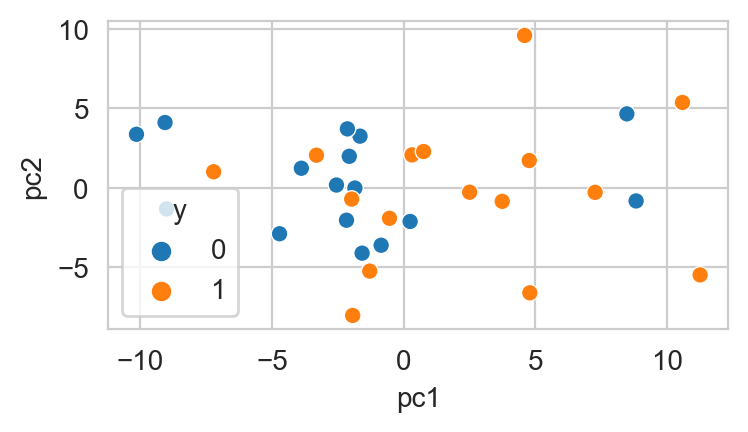

In [56]:
plt.figure(figsize=(4,2), dpi=200)
sns.scatterplot(
    data=df_train,
    x='pc1',
    y='pc2',
    hue='y'
);

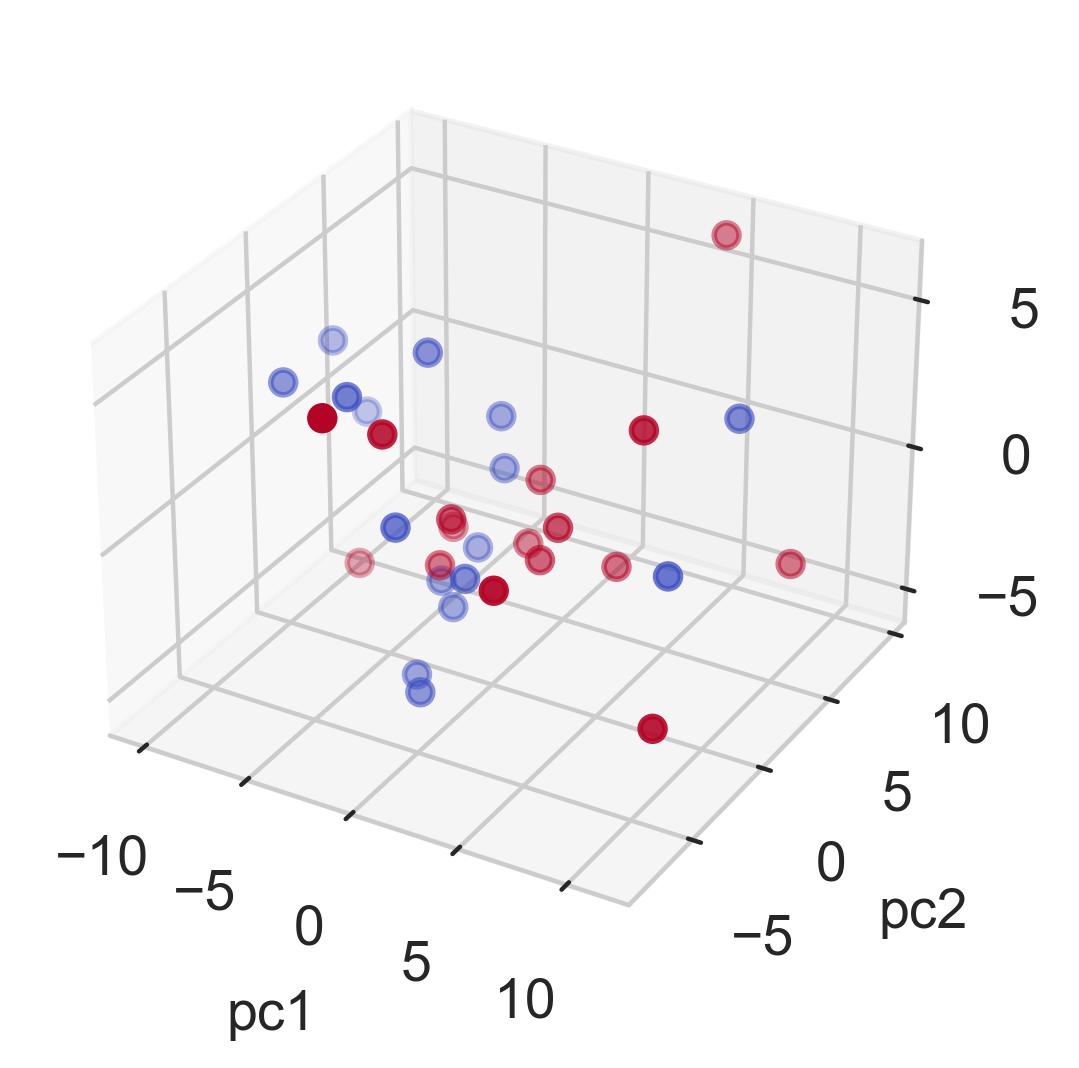

In [57]:
from mpl_toolkits.mplot3d import Axes3D

sns.set_style("whitegrid",{'axes.grid':False})
fig = plt.figure(figsize=(3,3), dpi=400)
ax = fig.add_subplot(111, projection='3d')

x = df_train['pc1']
y = df_train['pc2']
z = df_train['pc3']
c = df_train['y']

ax.set_xlabel("pc1")
ax.set_ylabel("pc2")
ax.set_zlabel("pc3")

ax.scatter(x, y, z, c=c, cmap='coolwarm');

### Kernel PCA

In [58]:
kpca = KernelPCA(n_components=11, kernel='poly')
kpca.fit(Xtrain_scale)

KernelPCA(kernel='poly', n_components=11)

In [59]:
T_kpca = kpca.transform(Xtrain_scale)

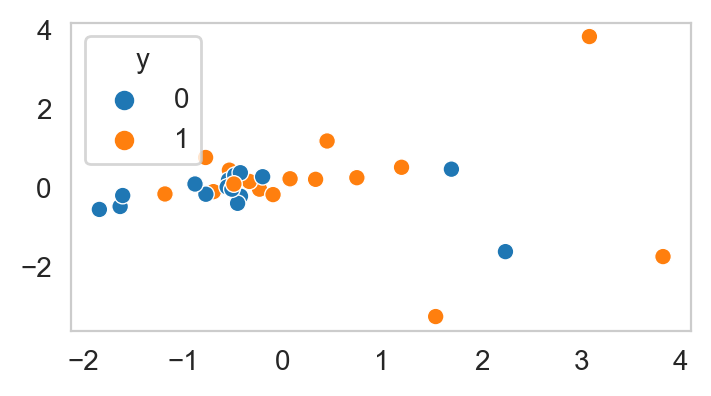

In [60]:
plt.figure(figsize=(4,2), dpi=200)
sns.scatterplot(
    x = T_kpca[:, 0],
    y = T_kpca[:, 1],
    hue = df_train['y']
);

In [61]:
#week4 class imbalance 2.4 for PCA , use standard scaler, no pipeline

## Pipeline

In [62]:
'''
# Logistic regression
model_logreg = Pipeline(
    steps=["classifier", LogisticRegression(C=0.0202, penalty="l2", solver="liblinear")])
#training_acccuracy = model_logreg.score(Xtrain, ytrain)
'''

'\n# Logistic regression\nmodel_logreg = Pipeline(\n    steps=["classifier", LogisticRegression(C=0.0202, penalty="l2", solver="liblinear")])\n#training_acccuracy = model_logreg.score(Xtrain, ytrain)\n'

In [63]:
estimator = Pipeline(
    steps=[
        ('scaler', StandardScaler()),
        ('pca',PCA(svd_solver='full')),
        ('log_reg',LogisticRegression())
        ]
        )

In [64]:
# Grid search parameters
param_grid = {
    'pca__n_components': [0.90, 0.95, 0.99],
    'log_reg__max_iter': [20, 25, 30, 50, 100, 1_000],
    'log_reg__C': [0.01, 0.1, 1.0, 10.0, 100.0 ]
}

## Hyperparameter tuning, week3, HypOp, Use param grid

In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
gscv = GridSearchCV(
    estimator=estimator,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5, 
    n_jobs=-1,
    verbose=1
)

In [67]:
import time
# initial time
ti = time.time()

# grid-search cross-validation
gscv.fit(Xtrain,ytrain)

# final time 
tf = time.time()

# time taken
print(f"time taken: {round(tf-ti,2)} sec")

Fitting 5 folds for each of 90 candidates, totalling 450 fits
time taken: 3.79 sec


In [68]:
gscv.cv_results_

{'mean_fit_time': array([0.08850732, 0.02914367, 0.01312475, 0.0160327 , 0.01132374,
        0.02193484, 0.00783591, 0.01763296, 0.01051455, 0.01159945,
        0.0107233 , 0.01570435, 0.0151165 , 0.01239309, 0.01569681,
        0.01145158, 0.01302752, 0.01578851, 0.012499  , 0.01184435,
        0.01303244, 0.01476626, 0.0113266 , 0.01293626, 0.01288428,
        0.01391277, 0.01104293, 0.01280689, 0.01445794, 0.01453719,
        0.01128955, 0.01389999, 0.0146378 , 0.01250157, 0.01465592,
        0.01503325, 0.01914506, 0.01740685, 0.01673737, 0.01569667,
        0.02341113, 0.0325428 , 0.01824775, 0.0185142 , 0.02379212,
        0.01918707, 0.02248597, 0.02151065, 0.01944351, 0.01953077,
        0.01735072, 0.01644058, 0.01608109, 0.0207099 , 0.02103815,
        0.01768126, 0.01762404, 0.02241263, 0.02326016, 0.02430177,
        0.02044401, 0.02340417, 0.0272049 , 0.02350039, 0.02524199,
        0.02799578, 0.02123475, 0.02400889, 0.0354322 , 0.02459273,
        0.02954769, 0.02888398,

In [69]:
gscv.best_params_

{'log_reg__C': 0.1, 'log_reg__max_iter': 20, 'pca__n_components': 0.99}

In [70]:
round(gscv.best_score_,6)

0.72381

In [71]:
best_model = gscv.best_estimator_
best_model

Pipeline(steps=[('scaler', StandardScaler()),
                ('pca', PCA(n_components=0.99, svd_solver='full')),
                ('log_reg', LogisticRegression(C=0.1, max_iter=20))])

In [72]:
best_model.fit(Xtrain,ytrain)

Pipeline(steps=[('scaler', StandardScaler()),
                ('pca', PCA(n_components=0.99, svd_solver='full')),
                ('log_reg', LogisticRegression(C=0.1, max_iter=20))])

In [73]:
# training score
training_score = best_model.score(Xtrain,ytrain)

# test score
test_score = best_model.score(Xtest,ytest)

print(f'Train score: {round(training_score,6)}')
print(f'Test score : {round(test_score,6)}')

Train score: 0.875
Test score : 0.111111


In [74]:
'''
# list of columns to show
column_list = [#'mean_test_score',
               #'std_test_score',
               #'rank_test_score'
               'pca__n_components',
               'log_reg__max_iter'
              ]
# create result dataframe
result_df = pd.DataFrame(gscv.cv_results_)[column_list]

# rename columns
result_df.rename(
    columns=lambda name: name.split('__')[-1],inplace=True
)

# order by rank
result_df.sort_values(
    by='rank_test_score', ascending=True, inplace=True, ignore_index=True
)
'''

"\n# list of columns to show\ncolumn_list = [#'mean_test_score',\n               #'std_test_score',\n               #'rank_test_score'\n               'pca__n_components',\n               'log_reg__max_iter'\n              ]\n# create result dataframe\nresult_df = pd.DataFrame(gscv.cv_results_)[column_list]\n\n# rename columns\nresult_df.rename(\n    columns=lambda name: name.split('__')[-1],inplace=True\n)\n\n# order by rank\nresult_df.sort_values(\n    by='rank_test_score', ascending=True, inplace=True, ignore_index=True\n)\n"

In [75]:
'''
#ideas for Hyperparameter
model = LogisticRegression()

    

    # Random search parameters
    param_random = dict(
        solver=["newton-cg", "lbfgs", "liblinear"],
        penalty=["l1", "l2", "elasticnet"],
        C=loguniform(1e-5, 100),
    )
'''

'\n#ideas for Hyperparameter\nmodel = LogisticRegression()\n\n    \n\n    # Random search parameters\n    param_random = dict(\n        solver=["newton-cg", "lbfgs", "liblinear"],\n        penalty=["l1", "l2", "elasticnet"],\n        C=loguniform(1e-5, 100),\n    )\n'

## RD-Forest pipeline (errors)

In [76]:
Xtrain

,p0,p1,p2,p3,p4,p5,p6,p7,p8,p9,...,p78,p79,p80,p81,p82,p83,p84,p85,p86,p87
measurement,,,,,,,,,,,,,,,,,,,,,
21,11.000000,-28.333333,-5.000000,12.000000,1.333333,0.333333,16.333333,10.333333,75.000000,66.666667,...,-5.666667,-4.000000,-5.666667,1.666667,-0.333333,28.333333,269.666667,2164.333333,2890.000000,1.666667
17,9.666667,-7.333333,15.000000,3.000000,-3.666667,-3.000000,1.000000,1.333333,-12.333333,-22.333333,...,-19.666667,-2.666667,-10.000000,-6.000000,-2.666667,10.333333,37.000000,-123.333333,84.666667,-3.333333
36,-6.333333,-22.000000,-8.666667,2.333333,-2.000000,-1.333333,0.333333,0.333333,-8.333333,-23.000000,...,-28.666667,7.333333,4.333333,-3.666667,0.666667,-28.000000,18.000000,-460.000000,-190.666667,0.333333
31,-2.000000,-4.666667,13.666667,-6.333333,-6.000000,-6.333333,-3.666667,-5.000000,-30.333333,-68.000000,...,-8.000000,-4.000000,-4.000000,-7.000000,-4.000000,-32.666667,-76.333333,-1535.000000,-57.666667,-1.333333
33,12.666667,-60.333333,-2.333333,-4.333333,0.333333,-3.333333,18.666667,9.000000,19.333333,-8.666667,...,-39.000000,-0.666667,-8.333333,3.666667,-4.000000,50.000000,324.666667,2552.666667,2827.666667,7.000000
11,-26.333333,-4.333333,-3.333333,-11.333333,1.666667,7.333333,12.000000,11.666667,60.666667,101.333333,...,26.333333,-7.333333,3.666667,8.333333,10.333333,27.000000,217.000000,898.666667,927.333333,-2.333333
28,-20.666667,6.666667,-18.666667,6.333333,3.333333,1.000000,4.333333,-1.333333,14.000000,-3.000000,...,15.333333,13.000000,7.000000,7.000000,2.666667,1.333333,7.666667,-54.333333,237.000000,-3.666667
1,-20.666667,-14.666667,5.000000,1.333333,6.666667,2.666667,19.333333,4.000000,32.666667,69.000000,...,-43.333333,6.000000,-2.666667,6.666667,-0.666667,26.333333,235.666667,1735.000000,2508.000000,-2.666667
29,10.000000,2.666667,9.666667,-4.333333,-3.000000,-1.000000,-3.000000,-3.333333,-0.666667,-28.000000,...,-16.000000,-9.000000,-2.333333,-5.666667,-2.666667,-9.333333,-149.000000,-855.000000,-1280.666667,-1.000000


In [77]:
# scaling 
transformer = Pipeline(
    steps=[
        ()
    ]
)

In [78]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", transformer, Xtrain),
    ]
)

In [79]:
estimator = Pipeline(
    steps=[
        ('scaler', StandardScaler()), # preprocessing step
        ('rf', RandomForestClassifier()) # random forest regression?
    ]
)

In [80]:
param_grid = {
    'rf__n_estimators': [50,100,200,300,500],
    'rf__max_depth': [5,10,20,50,100,None], # Maximum depth of the trees
    'rf__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    #'criterion': ['gini', 'entropy'],  # Splitting criterion
    #'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    #'max_features': ['auto', 'sqrt'],  # Number of features to consider at each split
    #'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

In [81]:
gscv = GridSearchCV(
    estimator=estimator,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5, 
    n_jobs=-1,
    verbose=1
)

In [82]:
ytrain = ytrain.astype(int) #was float, better int

In [83]:
# initial time
ti = time.time()

# grid-search cross-validation
gscv.fit(Xtrain,ytrain)

# final time 
tf = time.time()

# time taken
print(f"time taken: {round(tf-ti,2)} sec")

Fitting 5 folds for each of 90 candidates, totalling 450 fits
time taken: 65.54 sec


In [84]:
gscv.best_params_

{'rf__max_depth': None, 'rf__min_samples_split': 10, 'rf__n_estimators': 50}

In [85]:
round(gscv.best_score_,6)

0.785714

In [86]:
best_model = gscv.best_estimator_
best_model

Pipeline(steps=[('scaler', StandardScaler()),
                ('rf',
                 RandomForestClassifier(min_samples_split=10,
                                        n_estimators=50))])

In [87]:
best_model.fit(Xtrain,ytrain);

In [88]:
# training score
training_score = best_model.score(XtrainN,ytrain)

# test score
test_score = best_model.score(Xtest,ytest)

print(f'Train score: {training_score}')
print(f'Test score : {test_score}')

Train score: 0.9375
Test score : 0.3333333333333333


In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# DataFrame aus der CSV-Datei laden
Xtrain_new = pd.read_csv('Xtrain.csv', index_col=0)

# Define the transformer for scaling
transformer = Pipeline(
    steps=[
            ('scaler', StandardScaler())
    ]
)

# Create the ColumnTransformer with the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("num", transformer),
    ]
)

# Create the pipeline with the preprocessor and the estimator
estimator = Pipeline(
    steps=[
       # ('preprocessor', preprocessor),  # Preprocessing step
        ('rf', RandomForestClassifier())  # Random Forest Classifier
    ]
)

# Define the parameter grid for the Random Forest Classifier
param_grid = {
    'rf__n_estimators': [100, 200, 300],
    #'rf__criterion': ['gini', 'entropy'],
    #'rf__max_depth': [None, 5, 10],
    #'rf__min_samples_split': [2, 5, 10],
    #'rf__min_samples_leaf': [1, 2, 4],
    #'rf__max_features': ['auto', 'sqrt'],
    #'rf__bootstrap': [True, False]
}

# Perform grid search with the parameter grid and pipeline
grid_search = GridSearchCV(estimator, param_grid, cv=5)
grid_search.fit(Xtrain_new, ytrain)

GridSearchCV(cv=5, estimator=Pipeline(steps=[('rf', RandomForestClassifier())]),
             param_grid={'rf__n_estimators': [100, 200, 300]})

In [90]:
best_model = grid_search.best_estimator_
grid_search.best_params_


{'rf__n_estimators': 100}

In [91]:
best_model.fit(Xtrain_new,ytrain)

Pipeline(steps=[('rf', RandomForestClassifier())])

In [92]:
# training score
training_score = best_model.score(Xtrain_new,ytrain)

# test score
test_score = best_model.score(Xtest,ytest)

print(f'Train score: {round(training_score,6)}')
print(f'Test score : {round(test_score,6)}')

Train score: 1.0
Test score : 0.333333


### KNN (error, GridSearch output is NaN!)

In [93]:
'''
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer

estimator = Pipeline(
    steps=[
        #('preprocessor', preprocessor), # preprocessing step
        ('knn', KNeighborsRegressor())  # knn regression
    ]
)
param_grid = {
    'knn__n_neighbors': list(range(1,11)),
    'knn__metric': ['euclidean', 'manhattan', 'minkowski'],
    'knn__weights': ['uniform', 'distance']
}

# Define the scoring metrics
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)


gscv = GridSearchCV(
    estimator=estimator,
    param_grid=param_grid,
    scoring={'mse': mse_scorer, 'mae': mae_scorer},
    refit='mse',
    cv=5, 
    n_jobs=-1,
    verbose=1
)

# initial time
ti = time.time()

# grid-search cross-validation
gscv.fit(Xtrain,ytrain)

# final time 
tf = time.time()

# time taken
print(f"time taken: {round(tf-ti,2)} sec")

#best parameters
print(gscv.best_params_)

#best score
print(round(gscv.best_score_,6))

#best model
best_model = gscv.best_estimator_

#best model fit
best_model.fit(Xtrain,ytrain);

# training score
training_score = best_model.score(Xtrain,ytrain)

# test score
test_score = best_model.score(Xtest,ytest)

print(f'Train score: {round(training_score,6)}')
print(f'Test score : {round(test_score,6)}')
'''

'\nfrom sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer\n\nestimator = Pipeline(\n    steps=[\n        #(\'preprocessor\', preprocessor), # preprocessing step\n        (\'knn\', KNeighborsRegressor())  # knn regression\n    ]\n)\nparam_grid = {\n    \'knn__n_neighbors\': list(range(1,11)),\n    \'knn__metric\': [\'euclidean\', \'manhattan\', \'minkowski\'],\n    \'knn__weights\': [\'uniform\', \'distance\']\n}\n\n# Define the scoring metrics\nmse_scorer = make_scorer(mean_squared_error, greater_is_better=False)\nmae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)\n\n\ngscv = GridSearchCV(\n    estimator=estimator,\n    param_grid=param_grid,\n    scoring={\'mse\': mse_scorer, \'mae\': mae_scorer},\n    refit=\'mse\',\n    cv=5, \n    n_jobs=-1,\n    verbose=1\n)\n\n# initial time\nti = time.time()\n\n# grid-search cross-validation\ngscv.fit(Xtrain,ytrain)\n\n# final time \ntf = time.time()\n\n# time taken\nprint(f"time taken: {round(tf-ti,

In [94]:
'''
#new try:
model_knn = KNeighborsRegressor()
model_knn.fit(Xtrain, ytrain)

training_score = model_knn.score(Xtrain,ytrain)

# test score
test_score = model_knn.score(Xtest,ytest)

print(f'Train score: {round(training_score,6)}')
print(f'Test score : {round(test_score,6)}')
'''

"\n#new try:\nmodel_knn = KNeighborsRegressor()\nmodel_knn.fit(Xtrain, ytrain)\n\ntraining_score = model_knn.score(Xtrain,ytrain)\n\n# test score\ntest_score = model_knn.score(Xtest,ytest)\n\nprint(f'Train score: {round(training_score,6)}')\nprint(f'Test score : {round(test_score,6)}')\n"

## Try full pipeline model comparison

In [95]:
# Data analysis stack
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning stack
from sklearn.model_selection import (
    train_test_split,
    RepeatedStratifiedKFold,
    GridSearchCV,
    RandomizedSearchCV,
    KFold
)
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (
    OneHotEncoder,
    StandardScaler,
    MinMaxScaler,
    FunctionTransformer,
)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.neighbors import KNeighborsClassifier

# Evaluation metrics
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    RocCurveDisplay,
    roc_curve,
    roc_auc_score,
    precision_recall_curve,
    log_loss,
    mean_absolute_error
)
from sklearn.utils.validation import check_is_fitted
from scipy.stats import randint, loguniform

# Miscellaneous
import warnings
from datetime import datetime

warnings.filterwarnings("ignore")

In [96]:
# Class to select Features from dataframe
class FeatureSelector(BaseEstimator, TransformerMixin):
    # Initializer 
    def __init__(self, columns):
        # Save the features list internally in the class
        self.columns = columns
        
    def fit(self, X, y = None):
        # There is nothing to do here
        return self    
    
    def transform(self, X, y = None):
        # Return the dataframe with the specified features
        return X[self.columns]

In [97]:
num_features =  Xtrain.columns.tolist() #['p18','p77']

cat_features = []

features = num_features + cat_features

target = "Survived"
# Feature Engineering
pre_transformer = Pipeline(
    steps=[
        ("feature_selector", FeatureSelector(features)),
    ]
)

# Numerical features
num_transformer = Pipeline(
    steps=[
        #("imputer", SimpleImputer(strategy="mean")),
        ("scaling", StandardScaler()),
    ]
)

# Categorical features
cat_transformer = Pipeline(
    steps=[
        ("onehot", OneHotEncoder(drop="first", handle_unknown="ignore")),
    ]
)

# Define preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ("num_transformer", num_transformer, num_features),
        ("cat_transformer", cat_transformer, cat_features),
    ]
)

In [98]:
# Logistic regression
model_logreg = Pipeline(
    steps=[
        ("pre_transformer", pre_transformer),
        ("preprocessor", preprocessor),
        ("classifier", LogisticRegression(C=0.0202, penalty="l2", solver="liblinear")),
    ]
)

# Random Forest
model_rfc = Pipeline(
    steps=[
        ("pre_transformer", pre_transformer),
        ("preprocessor", preprocessor),
        ("classifier", RandomForestClassifier(max_features="log2", n_estimators=100)),
        # n_estimators=600, min_samples_split=10, min_samples_leaf=4, max_depth=50, bootstrap=True,
    ]
)

# K nearest neighbors
model_knn = Pipeline(
    steps=[
        ("pre_transformer", pre_transformer),
        ("preprocessor", preprocessor),
        (
            "classifier",
            KNeighborsClassifier(metric="manhattan", n_neighbors=22, weights="uniform"),
        ),
    ]
)

# Catboost
model_catboost = Pipeline(
    steps=[
        ("pre_transformer", pre_transformer),
        ("preprocessor", preprocessor),
        ("classifier", CatBoostClassifier(max_depth=5, n_estimators=300, silent=True)),
    ]
)

# SVC
model_svc = Pipeline(
    steps=[
        ("pre_transformer", pre_transformer),
        ("preprocessor", preprocessor),
        ("classifier", SVC(probability=True)),
    ]
)

# XG Boost
model_xgb = Pipeline(
    steps=[
        ("pre_transformer", pre_transformer),
        ("preprocessor", preprocessor),
        ("classifier", XGBClassifier(random_state=1)),
    ]
)

# Define models for the voting classifier
models = [
    ("model_logreg", model_logreg),
    ("model_rfc", model_rfc),
    #("model_knn", model_knn),
    #("model_catboost", model_catboost),
    #("model_svc", model_svc),
    ("model_xgb", model_xgb),
]

# Instantiate model
classifier_model = VotingClassifier(models,
                                    voting='soft'
                                    #voting='hard'
                                    )


classifier_model.fit(Xtrain, ytrain)

VotingClassifier(estimators=[('model_logreg',
                              Pipeline(steps=[('pre_transformer',
                                               Pipeline(steps=[('feature_selector',
                                                                FeatureSelector(columns=['p0',
                                                                                         'p1',
                                                                                         'p2',
                                                                                         'p3',
                                                                                         'p4',
                                                                                         'p5',
                                                                                         'p6',
                                                                                         'p7',
                                                                                         'p8',
                                                                                         'p9',
                                                                                         'p10',
                                                                                         'p11',
                                                                                         'p12',
                                                                                         'p13',
                                                                                         'p14',
                                                                                         'p15',
                                                                                         'p16',
                                                                                         'p17',
                                                                                         'p18',
                                                                                         'p19',
                                                                                         'p20',
                                                                                         'p21',
                                                                                         'p22',
                                                                                         'p23',
                                                                                         'p24',
                                                                                         'p25',
                                                                                         'p26',
                                                                                         'p27',
                                                                                         'p28',
                                                                                         'p29', ...]))])),
                                              ('preprocessor',
                                               ColumnTransfo...
                                                             grow_policy=None,
                                                             importance_type=None,
                                                             interaction_constraints=None,
                                                             learning_rate=None,
                                                             max_bin=None,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=None,
                                                          

In [99]:
training_acccuracy = classifier_model.score(Xtrain, ytrain)
print(f"training accuracy: {round(training_acccuracy, 6)}")

test_acccuracy = classifier_model.score(Xtest, ytest)
print(f"test accuracy: {round(test_acccuracy, 6)}")

training accuracy: 1.0
test accuracy: 0.222222


[1 1 0 1 1 0 0 0 1]
[[1 4]
 [3 1]]


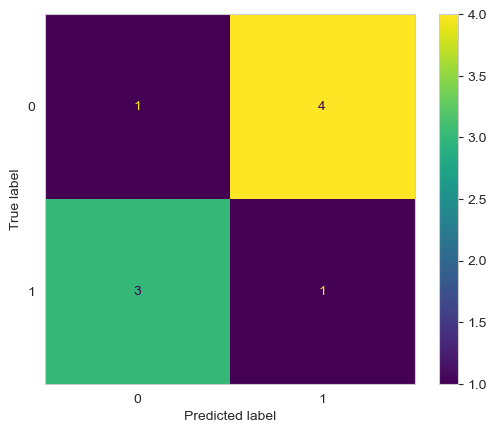

In [100]:
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay

ypred = classifier_model.predict(Xtest)
print(ypred)

confusion_matrix = metrics.confusion_matrix(ytest, ypred)
print(confusion_matrix)

ConfusionMatrixDisplay.from_predictions(ytest, ypred,cmap = 'viridis')
plt.show()

In [101]:
#next steps:
#cross validation OK
#rnd forest feature importance OK
#confusion matrix OK
#building app
#generating more data
#implementing code in medical device
